<a href="https://colab.research.google.com/github/hitksh18/Data-Science-Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, shapiro

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
# Load the dataset
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#clean the data
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill or drop missing values
df = df.dropna()  # or use df.fillna(method='ffill') if needed

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Data types
print("\nData types:\n", df.dtypes)

# Summary
print("\nData summary:\n", df.describe())

# Optional: fill missing values
df = df.fillna(df.mean())

Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
risk_score                  0
high_risk                   0
dtype: int64

Data types:
 age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
risk_score                    int64
hi

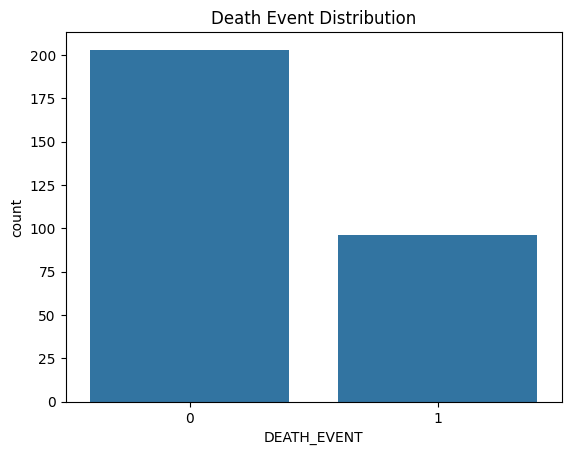

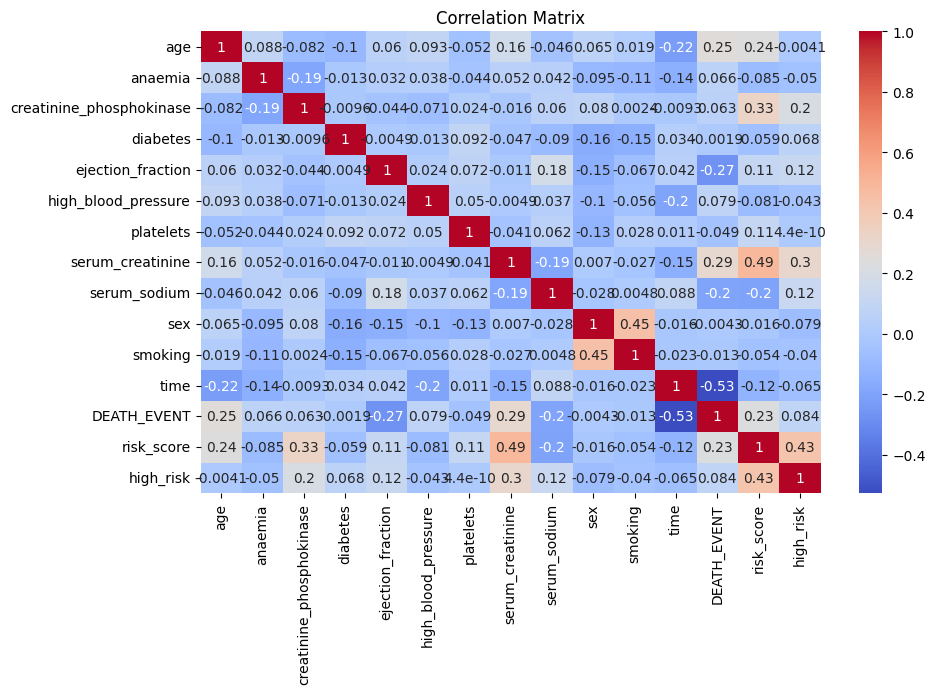

In [ ]:
# Basic stats
df.describe()

# Distribution of death event
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Death Event Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

age: p-value = 5.34966956855541e-05


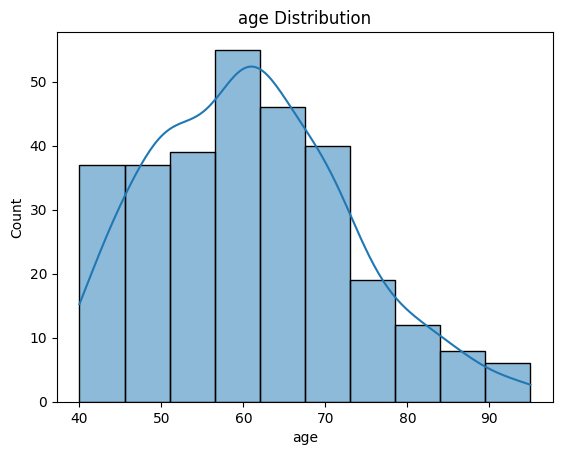

ejection_fraction: p-value = 7.215954027787795e-09


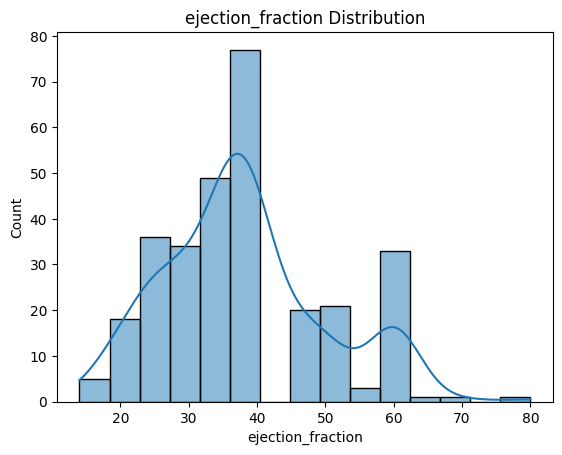

serum_creatinine: p-value = 5.392796300102366e-27


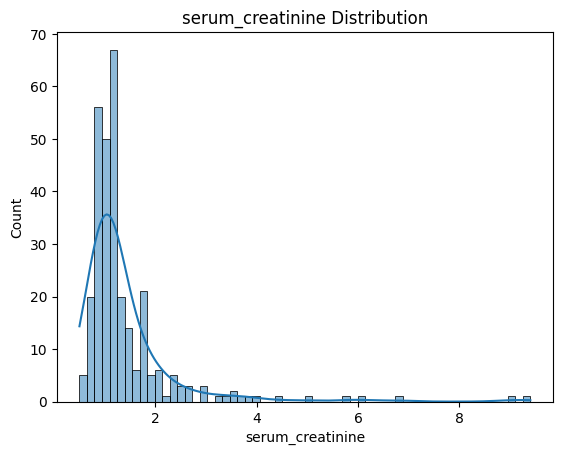

serum_sodium: p-value = 9.214856493071004e-10


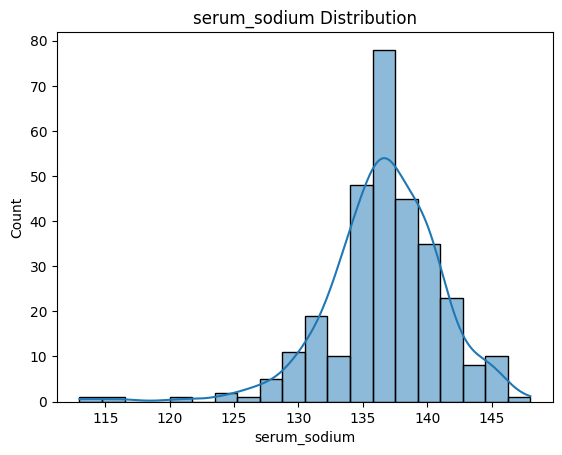

In [ ]:
from scipy.stats import shapiro

features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

for col in features:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p}")
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

In [ ]:
# Shapiro-Wilk test for a few numeric features
for col in df.columns:
    if df[col].dtype != 'object':
        stat, p = shapiro(df[col])
        print(f"{col}: p-value = {p}")

age: p-value = 5.34966956855541e-05
anaemia: p-value = 6.209524851638385e-25
creatinine_phosphokinase: p-value = 7.050458655796943e-28
diabetes: p-value = 5.1154715914654835e-25
ejection_fraction: p-value = 7.215954027787795e-09
high_blood_pressure: p-value = 1.1685927771257882e-25
platelets: p-value = 2.8834509850197122e-12
serum_creatinine: p-value = 5.392796300102366e-27
serum_sodium: p-value = 9.214856493071004e-10
sex: p-value = 1.1685927771256624e-25
smoking: p-value = 4.5818815675522345e-26
time: p-value = 6.284953847899754e-09
DEATH_EVENT: p-value = 4.5818815675522345e-26


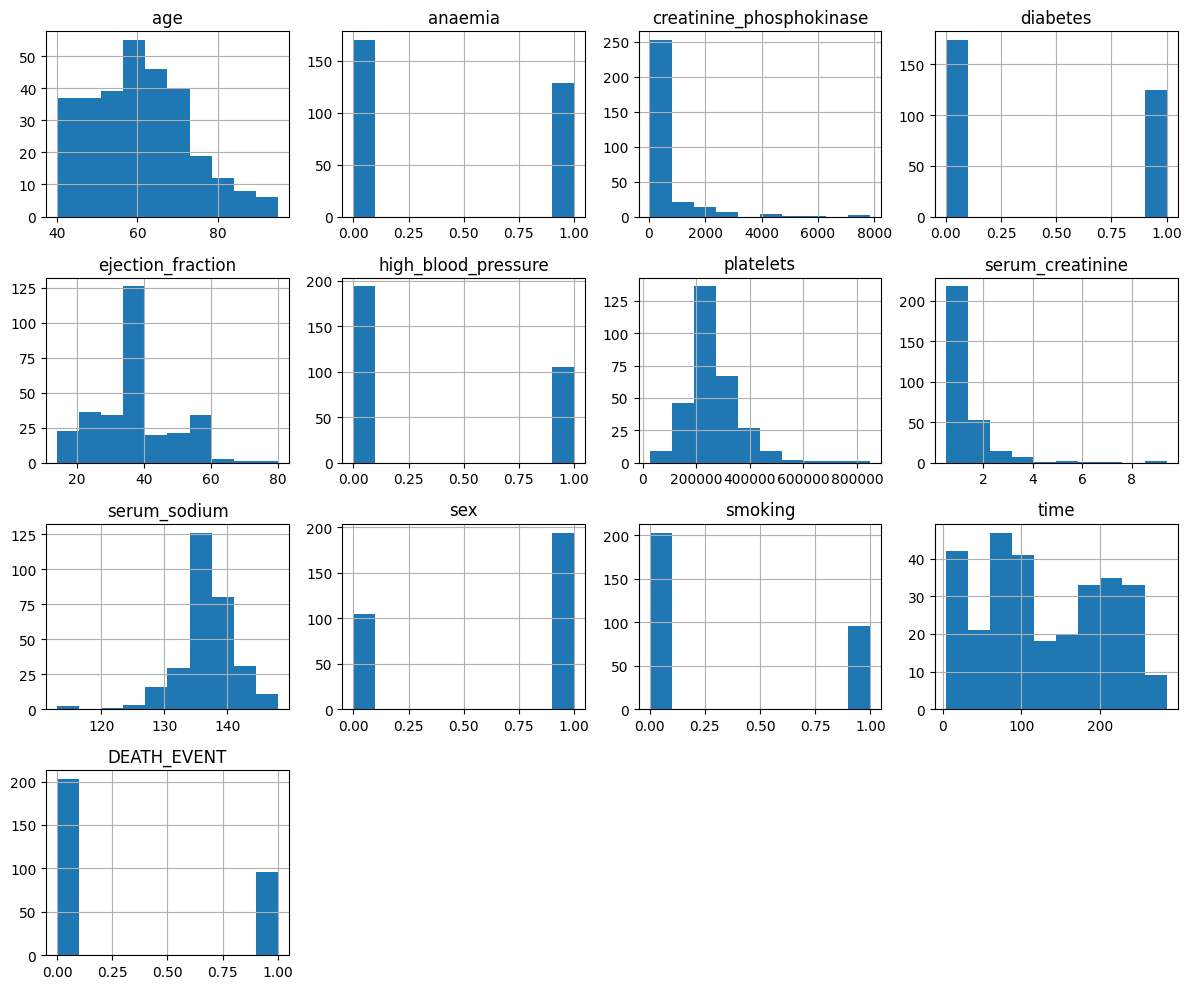

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [ ]:
# Calculate Z-scores for numeric features
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

# Set a threshold for high risk (e.g., abs(Z) > 2)
threshold = 2
high_risk_flags = (np.abs(z_scores) > threshold)

# Count how many risky features per patient
df['risk_score'] = high_risk_flags.sum(axis=1)
df['high_risk'] = df['risk_score'] >= 3  # You can adjust this rule


In [ ]:
# View high-risk patients
high_risk_patients = df[df['high_risk'] == True]
high_risk_patients.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,risk_score,high_risk
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1,4,True


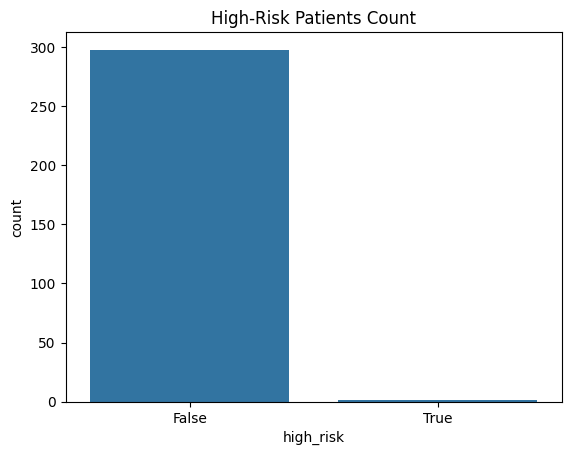

In [ ]:
sns.countplot(data=df, x='high_risk')
plt.title("High-Risk Patients Count")
plt.show()

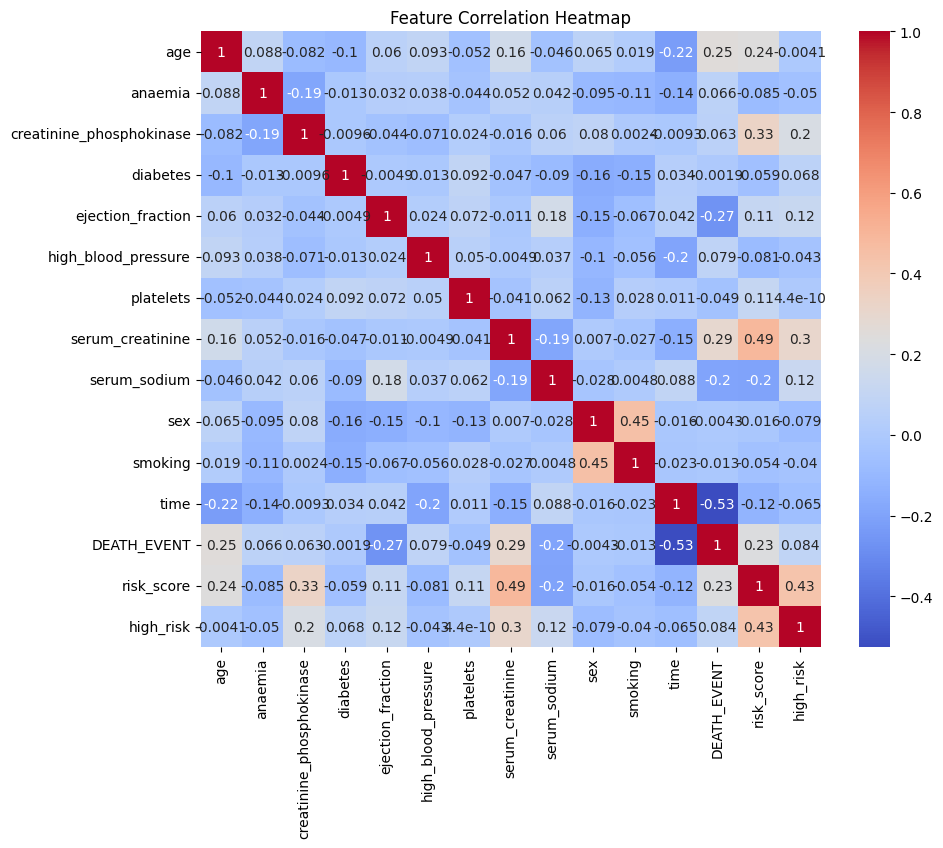

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
total = len(df)
high_risk_count = df['high_risk'].sum()
print(f"Total Patients: {total}")
print(f"High-Risk Patients: {high_risk_count} ({(high_risk_count/total)*100:.2f}%)")

Total Patients: 299
High-Risk Patients: 1 (0.33%)
